## Breastw Dataset

### Outlier detector: **IsolationForest(n_estimators=30, random_state=10101)**

In [2]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

### set outlier detector parameters 

In [3]:
set_x_generation_paramters(n_estimators=30, random_state=10101)

In [4]:
data, outliers_index, inliers_index = read_dataset('./dataset/breastw.mat')
dataset_name = 'breastw'
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('./weights/outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("./weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("./weights/outlier_weight_{}.npy".format(dataset_name))
n_cluster = 8
C = self_tuning_spectral_clustering_np(S)   
print('number of cluster: ', len(C))

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.35it/s]


n_cluster: 2 	 cost: 295.921866
number of cluster:  2


In [5]:
W_1 = cvx_solver(C, X, X.shape[1], 1)
W_3 = cvx_solver(C, X, X.shape[1], 3)
W_5 = cvx_solver(C, X, X.shape[1], 5)
W_10 = cvx_solver(C, X, X.shape[1], 10)


### 分別實驗 lambda=1、3、5、10

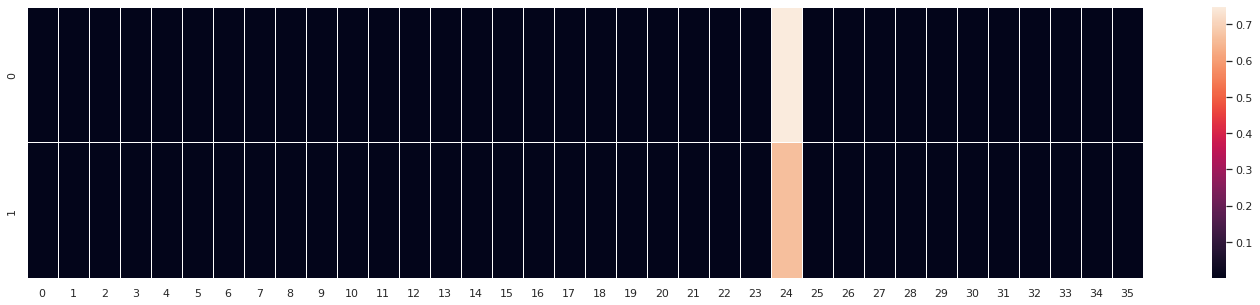

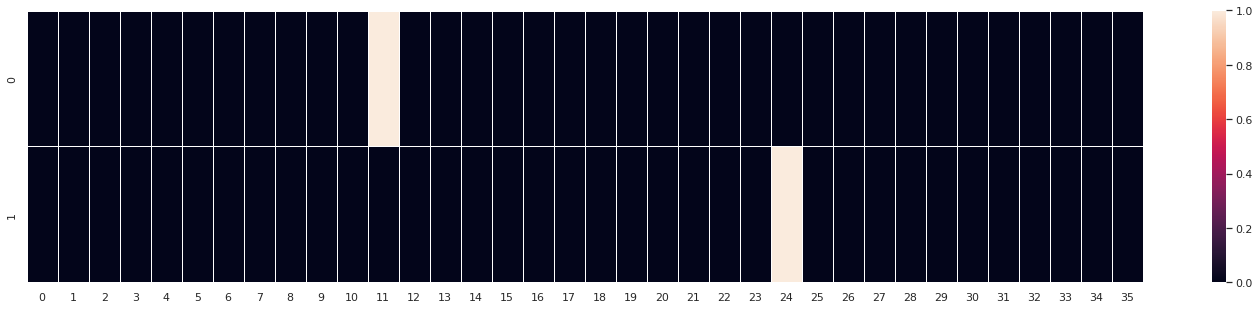

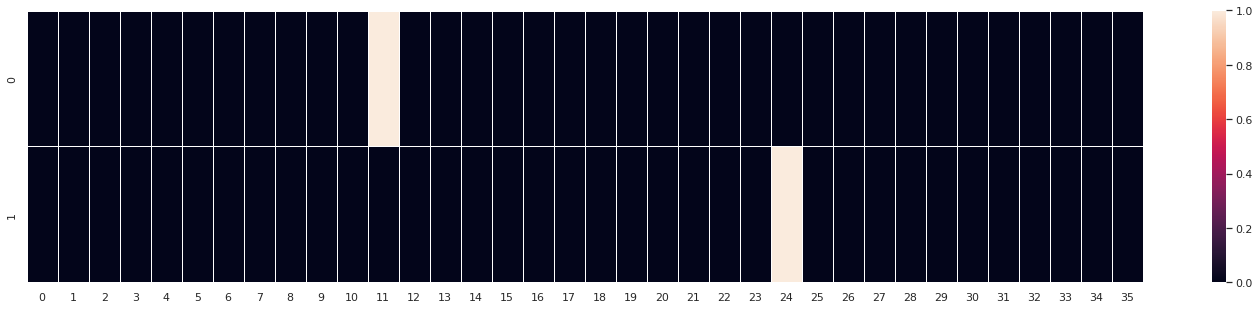

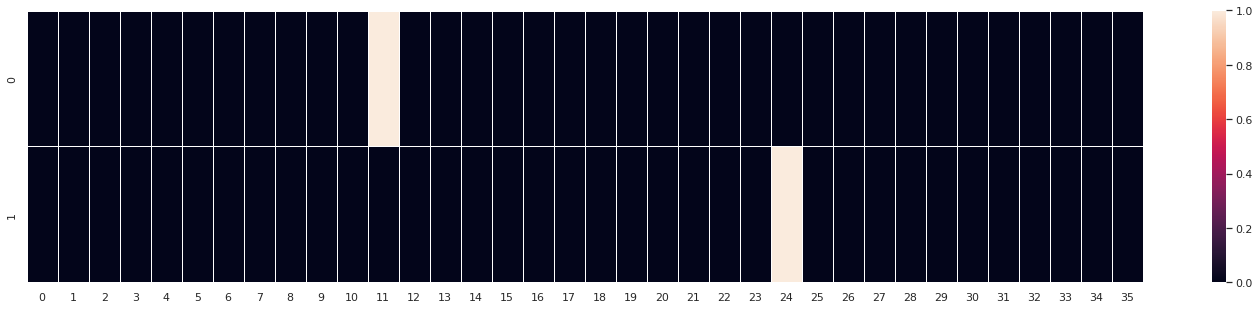

In [6]:
draw_heatmap(W_1.T) # lambda = 1  <====== global 
draw_heatmap(W_3.T) # lambda = 3 
draw_heatmap(W_5.T) # lambda = 5
draw_heatmap(W_10.T)   # lambda = 10  <===== local

### 為每個cluster找出最佳的feature pairs

In [7]:
cluster_fp_1 = get_clusters_fps(W_1.T, fp_record)
cluster_fp_3 = get_clusters_fps(W_3.T, fp_record)
cluster_fp_5 = get_clusters_fps(W_5.T, fp_record)
cluster_fp_10 = get_clusters_fps(W_10.T, fp_record)

In [8]:
df_list = [create_df(data[outliers_index], data[inliers_index], C[i]) for i in range(len(C))]

### Lambda = 1  Incrimination

In [9]:
BR_W_1, _ = get_incrimination(C, X, X.shape[1] , W_1.T, 3)

------------------
[0.750166208589943, 0.8090021267022285, 0.8224033922963085]
[0.7557964320877607, 0.8391153368803516, 0.8726931450542526]
------------------
[0.779853713287082, 0.8311772102875593, 0.8513848580336304]
[0.779853713287082, 0.8324931602770231, 0.8550730509617048]


### Lambda = 10  Incrimination

In [10]:
BR_W_10, _ = get_incrimination(C, X, X.shape[1] , W_10.T, 3)
save_W(BR_W_10, 'breastw')

------------------
[0.7557964320877607, 0.8005521818748657, 0.8627613265170042]
[0.7557964320877607, 0.8391153368803516, 0.8726931450542526]
------------------
[0.779853713287082, 0.8364218231382952, 0.8612130845511615]
[0.779853713287082, 0.8324931602770231, 0.8550730509617048]


### Lambda = 1 

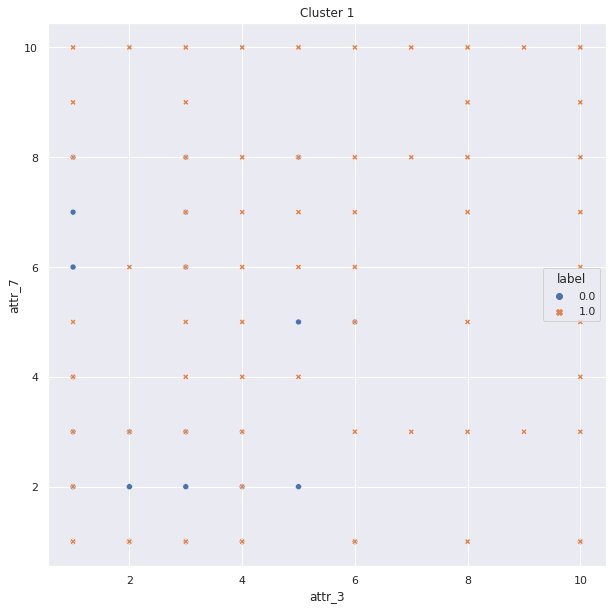

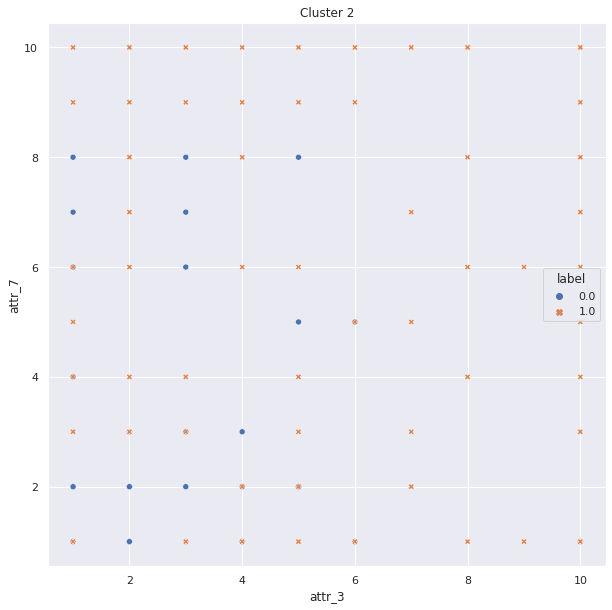

In [11]:
draw_scatter(df_list, cluster_fp_1)

### Lambda = 3 

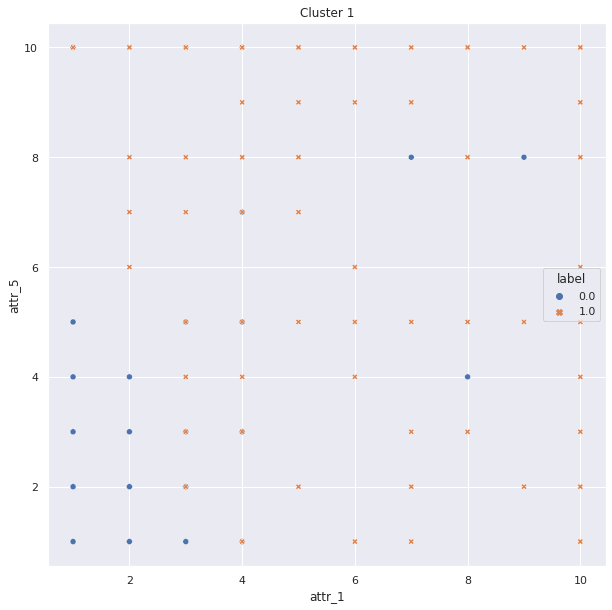

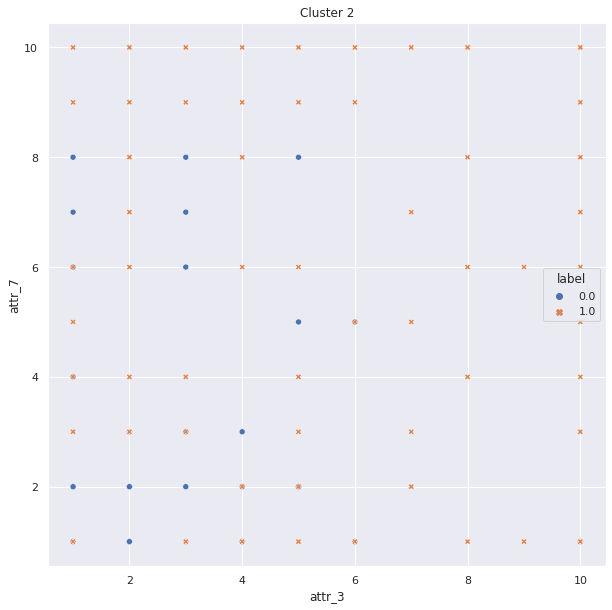

In [12]:
draw_scatter(df_list, cluster_fp_3)

### Lambda = 5

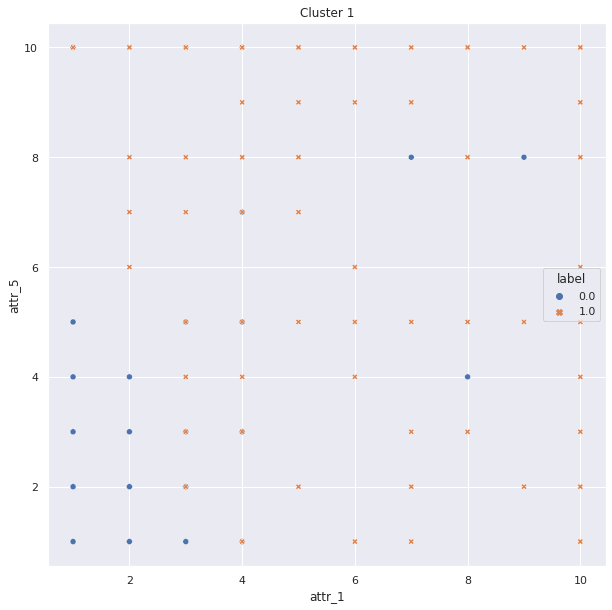

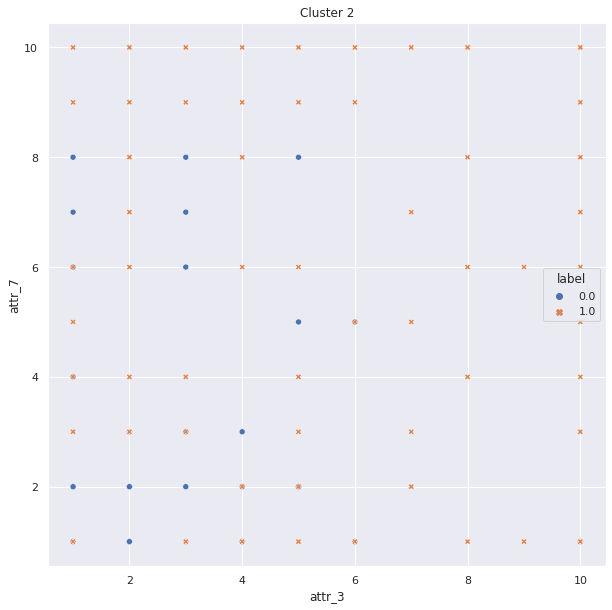

In [13]:
draw_scatter(df_list, cluster_fp_5)

### Lambda = 10

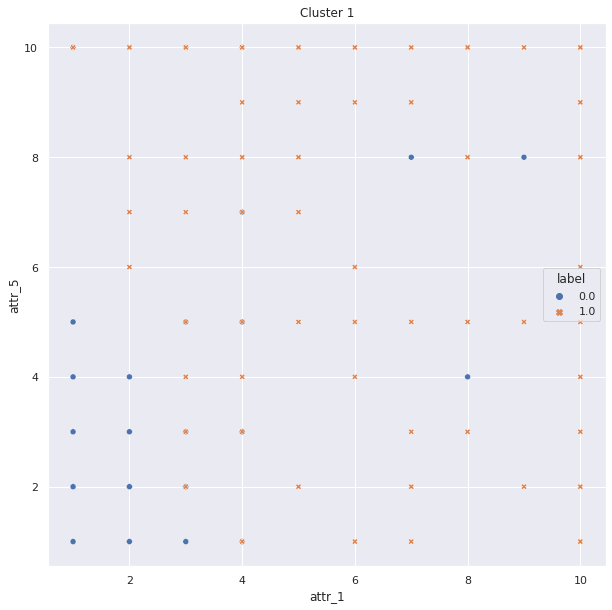

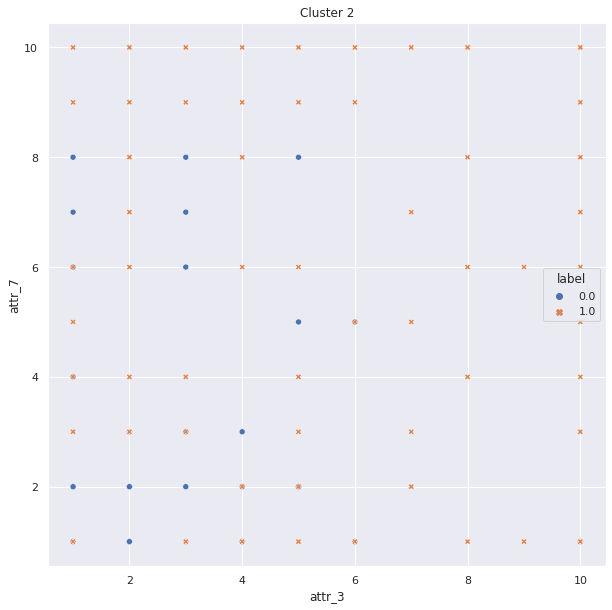

In [14]:
draw_scatter(df_list, cluster_fp_5)

### draw incrimination bar chart (using lambda = 1 & lambda = 10)

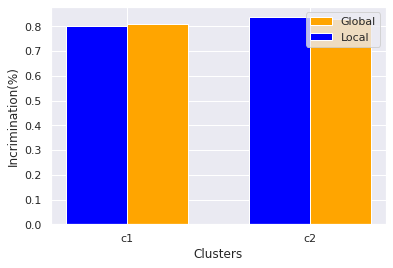

In [15]:
draw_barchart(BR_W_1, BR_W_10)